In [1]:
import matplotlib.pyplot as plt
import cv2
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import numpy as np
from sklearn.preprocessing import Normalizer

In [2]:
a = cv2.imread('Capture.PNG')
gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)

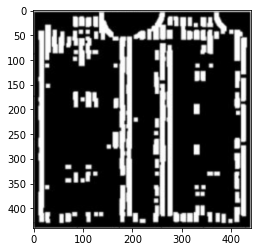

In [6]:
plt.imshow(a)

In [3]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [4]:
normalizer = Normalizer()
vertical_sum = gray.sum(axis=0)
vertical_sum_mv_avg = moving_average(vertical_sum,n=30)
vertical_sum_mv_avg_nm = normalizer.fit_transform([vertical_sum_mv_avg])[0]
variance = (vertical_sum_mv_avg_nm.std())**2

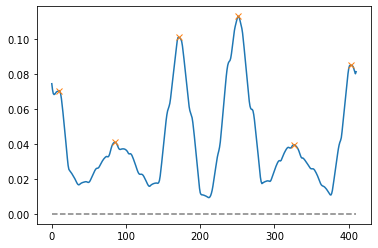

In [5]:
peaks, _ = find_peaks(vertical_sum_mv_avg_nm, prominence=variance)
plt.plot(vertical_sum_mv_avg_nm)
plt.plot(peaks, vertical_sum_mv_avg_nm[peaks], "x")
plt.plot(np.zeros_like(vertical_sum_mv_avg_nm), "--", color="gray")
plt.show()

In [8]:
for peak in peaks:
    cv2.line(a, pt1=(peak,100), pt2=(peak,400), color=(0,0,255), thickness=10)

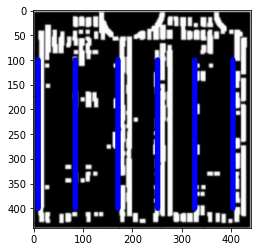

In [10]:
plt.imshow(a)